<a href="https://colab.research.google.com/github/Haroon-64/aud_classif/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
os.listdir('/content')

['.config', 'drive', 'sample_data']

In [ ]:
%cp -av "/content/drive/MyDrive/dataset" "/dataset/"



In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import glob
glob.glob('/content/drive/MyDrive/dataset')


['/content/drive/MyDrive/dataset']

In [ ]:
pip install librosa torch matplotlib


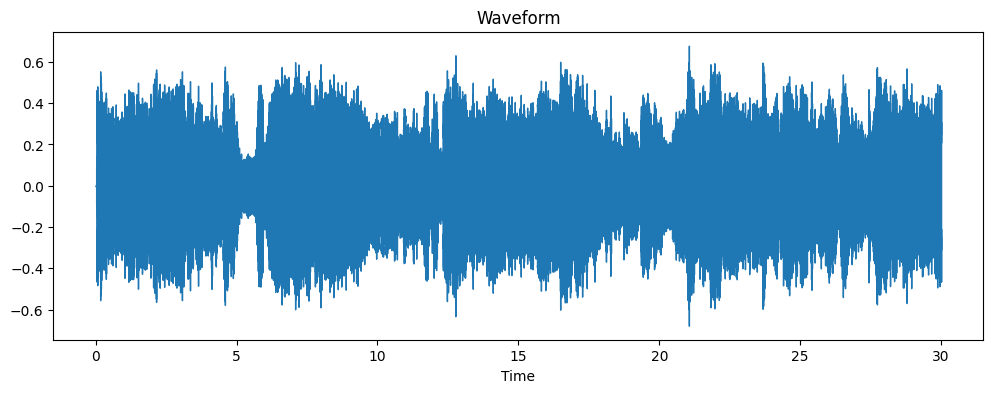

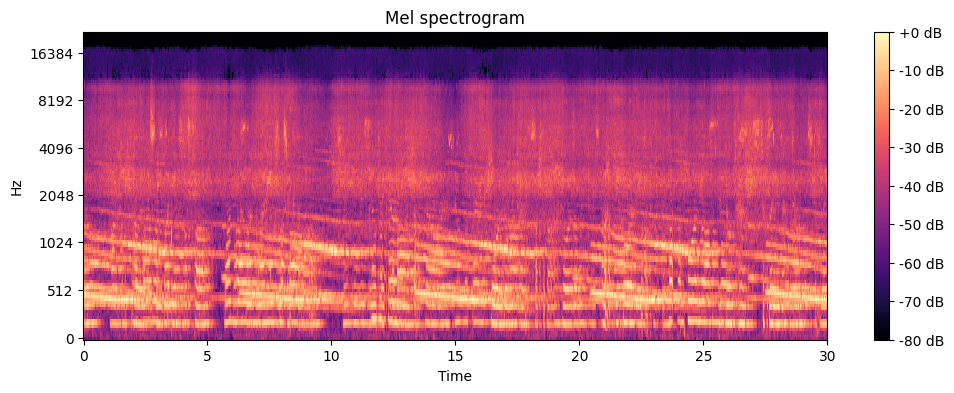

RandomModel(
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/10], Loss: 2.3309
Epoch [2/10], Loss: 2.2931
Epoch [3/10], Loss: 2.2561
Epoch [4/10], Loss: 2.2199
Epoch [5/10], Loss: 2.1844
Epoch [6/10], Loss: 2.1496
Epoch [7/10], Loss: 2.1153
Epoch [8/10], Loss: 2.0816
Epoch [9/10], Loss: 2.0485
Epoch [10/10], Loss: 2.0158
Accuracy: 0.5800


In [16]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

audio_dir = '/content/drive/MyDrive/dataset'
def load_audio_files(directory):
    audio_data = []
    sample_rate = None
    for file_name in os.listdir(directory):
        if file_name.endswith('.mp3'):
            file_path = os.path.join(directory, file_name)
            y, sr = librosa.load(file_path, sr=None)
            audio_data.append(y)
            if sample_rate is None:
                sample_rate = sr
    return audio_data, sample_rate

audio_data, sample_rate = load_audio_files(audio_dir)
y = audio_data[0]

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sample_rate)
plt.title('Waveform')
plt.show()

S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=128)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_DB, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

class RandomModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RandomModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_size = 128
hidden_size = 64
output_size = 10

model = RandomModel(input_size, hidden_size, output_size)
print(model)
num_samples = 100
X = torch.randn(num_samples, input_size)
y = torch.randint(0, output_size, (num_samples,))


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X)
    loss = criterion(outputs, y)

    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


model.eval()
with torch.no_grad():
    outputs = model(X)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()
    print(f'Accuracy: {accuracy:.4f}')
